# IoT Device Category Classification System using Advanced Deep Learning Techniques


Here in this notebook, we have implemented the Machine Learnig models that we will be comparing with the Deep Neural Network models which we have implemented in a different notebook.


The flow of our model pipeline for MultiClass IoT device classification task is as follows.

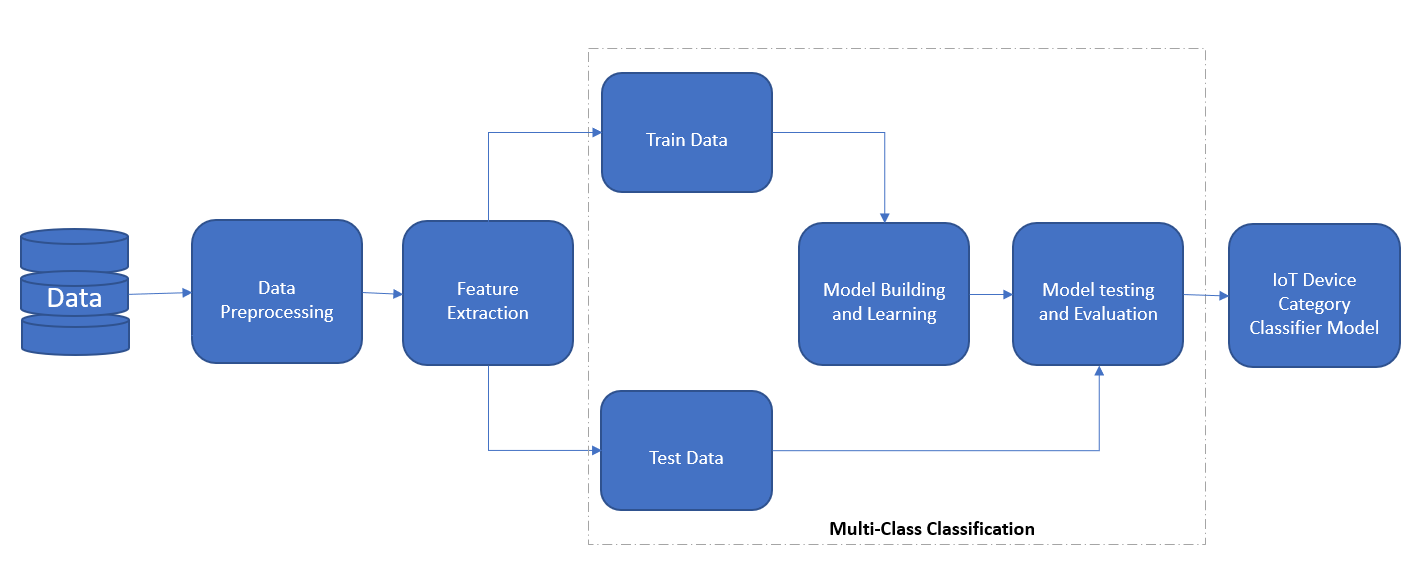

## Importing required Libraries

In [ ]:
# Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Getting the data into the dataframe
data = pd.read_csv('iot_data.csv')

In [ ]:
# Let's look at the shape of the data
data.shape

(1900, 299)

In [ ]:
# Let's take a look of the names of the feature colums in the data set 
data.columns

Index(['Unnamed: 0', 'ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A',
       'bytes_A_B_ratio', 'bytes_B', 'ds_field_A', 'ds_field_B',
       ...
       'suffix_is_co.il', 'suffix_is_com', 'suffix_is_com.sg',
       'suffix_is_else', 'suffix_is_empty_char_value',
       'suffix_is_googleapis.com', 'suffix_is_net', 'suffix_is_org',
       'suffix_is_unresolved', 'device_category'],
      dtype='object', length=299)

In [ ]:
# Let's take a look into the first five rows from the data
data.head()

,Unnamed: 0,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,0,9,5,5,1213,743,0.713924,668,0,0,...,0,0,0,1,0,0,0,0,0,security_camera
1,1,9,5,5,1213,743,1.806874,668,0,0,...,0,0,0,1,0,0,0,0,0,security_camera
2,2,9,5,5,1213,743,0.103124,668,0,0,...,0,0,0,1,0,0,0,0,0,security_camera
3,3,9,5,5,1213,743,1.806874,668,0,0,...,0,0,0,1,0,0,0,0,0,security_camera
4,4,9,5,5,1213,743,1.806874,668,0,0,...,0,0,0,1,0,0,0,0,0,security_camera


In [ ]:
# Removing the first column from the dataset 
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
# The updated data 
data.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


In [ ]:
# Getting the total count, mean, standard deviations, minimum, maxium and values at 25th, 50th and 75th quartile
data.describe()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_cloudfront.net,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved
count,1900.000000,1900.000000,1900.000000,1.900000e+03,1.900000e+03,1900.000000,1.900000e+03,1900.0,1900.000000,1900.000000,...,1900.0,1900.0,1900.000000,1900.0,1900.000000,1900.000000,1900.0,1900.0,1900.0,1900.000000
mean,227.773158,81.211579,146.878947,1.498682e+05,1.421069e+05,1.181570,7.824499e+03,0.0,16.951579,267.929434,...,0.0,0.0,0.019474,0.0,0.555789,0.318947,0.0,0.0,0.0,0.044211
std,4461.164912,1125.546944,3415.513067,4.937287e+06,4.870776e+06,3.477177,7.768975e+04,0.0,28.199316,3157.437208,...,0.0,0.0,0.138219,0.0,0.497009,0.466191,0.0,0.0,0.0,0.205617
min,0.000000,0.000000,0.000000,6.000000e+01,0.000000e+00,0.000000,6.000000e+01,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,2.400000e+02,0.000000e+00,0.000000,2.400000e+02,0.0,0.000000,1.487675,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,9.000000,5.000000,5.000000,1.213000e+03,7.430000e+02,0.622177,6.680000e+02,0.0,0.000000,1.575600,...,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000
75%,15.000000,7.000000,8.000000,2.411000e+03,1.160000e+03,1.201825,1.096000e+03,0.0,64.000000,1.630525,...,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000
max,184378.000000,39265.000000,145113.000000,2.137146e+08,2.108638e+08,73.967293,2.850771e+06,0.0,64.000000,58432.650400,...,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000


# Data Cleaning

In [ ]:
# As we can see some columns have only one value throughout the entire dataset.
# Because such columns will not be able to do better in learning process, we remove them.
for column in data.columns:
  if len(data[column].unique()) == 1:
    print(column, "has only one unique value")
    data = data.drop(column, axis = 1)

ds_field_A has only one unique value
http_cookie_values_entropy has only one unique value
http_cookie_values_stdev has only one unique value
http_cookie_values_var has only one unique value
http_req_bytes_entropy has only one unique value
http_req_bytes_stdev has only one unique value
http_req_bytes_var has only one unique value
packet_size_B_min has only one unique value
packet_size_min has only one unique value
ssl_handshake_duration_entropy has only one unique value
ssl_handshake_duration_stdev has only one unique value
ssl_handshake_duration_var has only one unique value
ttl_A_entropy has only one unique value
ttl_A_stdev has only one unique value
ttl_A_var has only one unique value
is_g_http has only one unique value
is_cdn_http has only one unique value
is_img_http has only one unique value
is_ad_http has only one unique value
B_port_is_5222 has only one unique value
B_port_is_5223 has only one unique value
B_port_is_54975 has only one unique value
B_port_is_8280 has only one uni

In [ ]:
# The shape of the data after getting rid of feature columns that has only one value throughout
data.shape

(1900, 254)

Let's try to look how many unique categories are there in the data so that we can get a sense of how many categories are there for the classification task of IOT devices.

In [ ]:
# Let's explore how many unique category of iot devices we have
data['device_category'].unique()

array(['security_camera', 'TV', 'smoke_detector', 'thermostat',
       'water_sensor', 'watch', 'baby_monitor', 'motion_sensor', 'lights',
       'socket'], dtype=object)

We obtained 10 categories/classes of IOT devices that we will be classifying them into based on the learning task.

The 10 categories of IOT devices are:

1. Security Camera
2. TV
3. Smoke Detector 
4. Thermostat
5. Water Sensor 
6. Watch
7. Baby Monitor
8. Motion Sensor 
9. Lights
10. Socket


We will create the Machine learning models that carry out the tasks of learning from the feature columns and help in predicting the correct target category of the IOT devices without any human participation.

Firstly, we seperate the data into features and target variables.

- X is the feature variable containing all the columns.
- y is the target variable containing the corresponding target values for the features. 

In [ ]:
# Splitting the data into features and target variables
X = data.drop('device_category', axis = 1)
y = data.device_category

Further, we divide the data into train and test set 
- For the train set we have used 80% of the data
- For the test set we have used 20% of the data

In [ ]:
# Splitting the data into train set (80% of the data) and test set (20% of the data) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Getting the total count, mean, standard deviations, minimum, maxium and values at 25th, 50th and 75th quartile for the X_train.

In [ ]:
X_train.describe()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_B,duration,http_GET,...,subdomain_is_www.cloud,domain_is_dlink,domain_is_else,domain_is_google,domain_is_proteussensor,domain_is_unresolved,suffix_is_com,suffix_is_else,suffix_is_empty_char_value,suffix_is_unresolved
count,1520.000000,1520.000000,1520.000000,1.520000e+03,1.520000e+03,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,...,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,138.757895,63.402632,75.673026,4.372133e+04,3.716353e+04,1.137870,6620.691447,17.184211,280.628912,0.086842,...,0.013158,0.003947,0.874342,0.002632,0.013158,0.042105,0.021711,0.557237,0.314474,0.042105
std,1459.197068,684.681461,798.799471,6.565083e+05,6.412107e+05,3.128233,42824.051349,28.317168,3185.365033,0.281696,...,0.113988,0.062725,0.331572,0.051248,0.113988,0.200895,0.145785,0.496877,0.464459,0.200895
min,0.000000,0.000000,0.000000,6.000000e+01,0.000000e+00,0.000000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.400000e+02,0.000000e+00,0.000000,240.000000,0.000000,1.487550,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,5.000000,5.000000,1.213000e+03,7.430000e+02,0.622177,668.000000,0.000000,1.575600,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15.250000,7.000000,8.000000,2.411000e+03,1.150250e+03,1.201825,1096.000000,64.000000,1.629400,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,24718.000000,12359.000000,15898.000000,2.338507e+07,2.302210e+07,63.428067,741540.000000,64.000000,58432.650400,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Applying Scaling

As we can see that the minimum values and the maximum values for the fearures are very different in range we will scale them so that model learns better representations from the data.

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.06770189, -0.06341185, -0.06971881, ...,  0.89138604,
        -0.67729846, -0.20965697],
       [-0.06084655, -0.05464576, -0.06470965, ..., -1.1218484 ,
         1.47645397, -0.20965697],
       [-0.09032451, -0.08386604, -0.09351233, ..., -1.1218484 ,
         1.47645397, -0.20965697],
       ...,
       [-0.09512325, -0.09263212, -0.09476462, ...,  0.89138604,
        -0.67729846, -0.20965697],
       [-0.08552577, -0.08240503, -0.08599859, ..., -1.1218484 ,
         1.47645397, -0.20965697],
       [-0.09512325, -0.09263212, -0.09476462, ..., -1.1218484 ,
         1.47645397, -0.20965697]])

We have defined a utility function that helps to get the total number of misclassified examples by the Machine Learning models.

In [ ]:
# A utility function 
def misclassified_total(cm):
  sum = 0
  for i in range(0, cm.shape[0]):
    for j in range(0, cm.shape[1]):
      if i == j:
        continue
      else:
        sum = sum + cm[i][j]
  
  return sum

## Random Forest Classifier


We will use Random Forest Classifier as our first model to learn the features and classify them into 10 IOT device categories.

- We have performed RandomizedSearchCV that will help in finding the best set of Hyperparameters values from the different set of values we provide for experimentation of different hyperparameters.

- This is helpful in returing the best combination of hyperparameters.

- The RandomizedSearchCV doesn't perform the exhaustive search on all the possible comibination of hyperparameters but random select different hyperparameter values and test them.

- This helps in faster execution compared to GridSearchCV.


![Random Forest Classifier](https://catalyst.earth/catalyst-system-files/help/COMMON/references/images/RT_schematic.png)


[Image Reference : https://catalyst.earth/catalyst-system-files/help/COMMON/references/images/RT_schematic.png]

### Model 1 (a) : Random Forest Classifier Hyperparameter tuning with Randomized Search CV

In [ ]:
# Initializing the model
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier()

We have used the 7 hyperparamters that we will experiment on tuning with the help of RandomizedSearchCV.

- n_estimators
- criterion
- min_samples_split
- min_samples_leaf
- max_depth
- max_features
- ccp_alpha

In [ ]:
# We will try to perform Random Search CV on these set of Hyperparamter values 
params = {'n_estimators': [10,30,50,100],
          'criterion': ['gini','entropy'],
          'min_samples_split':[0.1,2],
          'min_samples_leaf': [2,3],
          'max_depth': [2,3,5,10,20,30],
          'max_features': ['sqrt','log2'],
          'ccp_alpha': [0.0,0.001, 0.01,0.1]}

In [ ]:
# Importing RandomizedSerachCV from scikit learn  
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# We initialise the model 
rs_rf_model = RandomizedSearchCV(randomForestClassifier,param_distributions=params,cv=5,n_iter=20,n_jobs=1,verbose=0)

In [ ]:
# We will also keep the track of the time that helps in getting the convergence time for each model
import time 

Now, we will train the Random Forest Classifier model with the help of RandomizedSearchCV.

We will obtain the best set of hyperparameter values and the accuracy that corresponds to those hyperparameter values.

In [ ]:
# Training the Random Forest Classifier model and getting best set of hyperparameters through RandomizedSearchCV
start_rs_rf_model = time.time()
rs_rf_model.fit(X_train,y_train)
end_rs_rf_model = time.time()

total_time_rs_rf_model = end_rs_rf_model - start_rs_rf_model

In [ ]:
print(f"Total time required for Random Forest Classifier model to train with the help of RandomizedSearchCV : {total_time_rs_rf_model:.2f}s")

Total time required for Random Forest Classifier model to train with the help of RandomizedSearchCV : 11.71s


Let's take a look of the accuracy obtained in correctly classifying the trained set with the help of `rs_rf_model`.

In [ ]:
# Accuracy obtained on train set
rs_rf_accuracy_train = rs_rf_model.score(X_train, y_train)

In [ ]:
# Accuracy obtained on the test set 
rs_rf_accuracy_test = rs_rf_model.score(X_test, y_test)

In [ ]:
# Printing the train and test set accuracy for RandomizedSearchCV Random Forest Classifier model
print(f'The train set accuracy of RandomizedSearchCV Random Forest Classifier model is {rs_rf_accuracy_train*100:.2f}%')
print(f'The test set accuracy of RandomizedSearchCV Random Forest Classifier model is {rs_rf_accuracy_test*100:.2f}%')

The train set accuracy of RandomizedSearchCV Random Forest Classifier model is 96.25%
The test set accuracy of RandomizedSearchCV Random Forest Classifier model is 85.26%


Let's take a look at the hyperparameters that provided the above accuracy for the Random Forest Classifier model which we obtained using the RandomizedSearchCV.

In [ ]:
# The best hyperparameter values 
rs_rf_model.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

Now, we will try to obtain the predictions for the test set `X_test` data and create a confusion matrix.


The diagonal elements of the confusion matrix are correctly classified categories whereas the other elements are the number of misclassified categories from the predictions on Test set.

In [ ]:
# Getting predictions for the test set 
Y_pred_rs_rf = rs_rf_model.predict(X_test)

In [ ]:
# Confusion matrix for RandomizedSearchCV Random Forest Classifier model
cm1_rs_rf_model = metrics.confusion_matrix(y_test, Y_pred_rs_rf)
print(cm1_rs_rf_model)
cm1_rs_rf_model.shape

[[35  0  0  1  0  0  0  0  0  0]
 [ 1 27  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0 10  0  0  0]
 [ 1  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0 18  0  0  0 20  0  0  3]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 3  0  0  0  0  0  0  0 44  0]
 [ 0  0  7  0  0  0 11  0  0  5]]


(10, 10)

Now, we will get the count of misclassified categories in the predicted targets for the test set.

In [ ]:
# Getting the count of misclassified categories in the test set prediction
misclassified_rs_rf_model = misclassified_total(cm1_rs_rf_model)
print(f'Number of Misclassified categories by the Randomized Forest Classifier : {misclassified_rs_rf_model}')

Number of Misclassified categories by the Randomized Forest Classifier : 56


Let's create a HeatMap for the Random Forest Classifier Model with the best set of Hyperparameters tuned by RandomizedSearchCV.


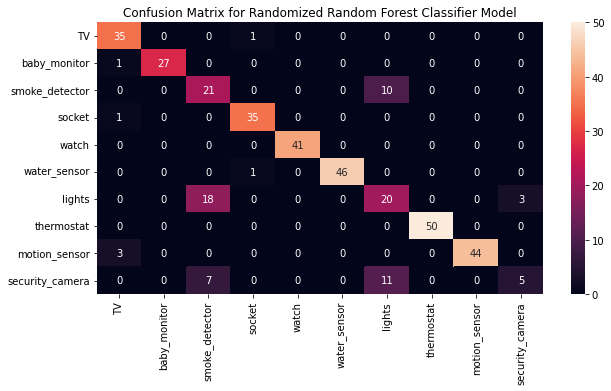

In [ ]:
class_names = ['TV', 'baby_monitor', 'smoke_detector','socket',
              'watch',
              'water_sensor',
              'lights',
              'thermostat',
              'motion_sensor',
              'security_camera']

plt.figure(figsize= (10,5))
hm_rs_rf_model = sns.heatmap(cm1_rs_rf_model, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_rs_rf_model = hm_rs_rf_model.set_title("Confusion Matrix for Randomized Random Forest Classifier Model")

We will perform the Hyperparameter tuning with the help of evolutionary algorithms like genetic algorithm and try to compare the accuracy obtained on the Random Forest Classifier tuned with Genetic Algorithm with the one obtained above.

### Model 1 (b) : Random Forest Classifier Hyperparameter Tuning with Genetic Algorithm

In [ ]:
# Installing the required library for carrying out hyperparameter tuning using Genetic Algorithm
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 13.1 MB/s 


In [ ]:
# Importing required packages for Genetic Hyperparameter Tuning (GASearchCV)
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

We have used the 7 hyperparamters that we will experiment on tuning with the help of RandomizedSearchCV.

- min_weight_fraction_leaf
- bootstrap
- max_depth
- max_leaf_nodes
- n_estimators

In [ ]:
# Here we have taken the different hyperparameters and set of values that the GASearchCV will try to optimise 
params_grid = {
              'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)
              }

In [ ]:
clf = RandomForestClassifier()

# For the cross validation purpose we have used StratifiedKFold 
cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=10,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=params_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
# We will try to find best set of hyperparameters using GASearchCV
from sklearn.metrics import accuracy_score

start_ga_rf_model = time.time()
evolved_estimator.fit(X_train,y_train)
end_ga_rf_model = time.time()


total_time_ga_rf_model = end_ga_rf_model - start_ga_rf_model

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.725927	0.0823145  	0.832241   	0.537555   
1  	19    	0.781506	0.047615   	0.824338   	0.663806   
2  	18    	0.815063	0.0137147  	0.828304   	0.788132   
3  	17    	0.829934	0.00628689 	0.841449   	0.822364   
4  	20    	0.839085	0.00725978 	0.848037   	0.822358   
5  	18    	0.84619 	0.00466777 	0.850664   	0.835541   
6  	18    	0.846387	0.00420551 	0.850664   	0.839464   
7  	20    	0.847039	0.0038022  	0.850664   	0.840769   
8  	18    	0.847568	0.00427775 	0.852639   	0.840131   
9  	18    	0.848228	0.00375567 	0.853299   	0.842106   
10 	17    	0.850464	0.000300489	0.850664   	0.850005   


Now, we use the Random Forest Classifier with the best values of Hyperparameters obtained using the GASearchCV to find the predictions of the target values on the features ie. `X_test`. 

We then use the function `accuracy_score` from scikit-learn in order to determine the accuracy of the model.

In [ ]:
print(f'Time taken by the GASearch Random Forest Classifier to find the best set of Hyperparameters is : {total_time_ga_rf_model:.2f}s')

Time taken by the GASearch Random Forest Classifier to find the best set of Hyperparameters is : 272.54s


In [ ]:
Y_pred_ga_rf_model_test = evolved_estimator.predict(X_test)

In [ ]:
accuracy_ga_rf_model_test = accuracy_score(y_test, Y_pred_ga_rf_model_test)

In [ ]:
Y_pred_ga_rf_model_train = evolved_estimator.predict(X_train)

In [ ]:
accuracy_ga_rf_model_train = accuracy_score(y_train, Y_pred_ga_rf_model_train)

In [ ]:
print(f'The train set accuracy of the Random Forest Classifier using GASearch CV is : {accuracy_ga_rf_model_train*100:.2f}%')
print(f'The test set accuracy of the Random Forest Classifier using GASearch CV is : {accuracy_ga_rf_model_test*100:.2f}%')

The train set accuracy of the Random Forest Classifier using GASearch CV is : 87.70%
The test set accuracy of the Random Forest Classifier using GASearch CV is : 83.68%


In [ ]:
cm_ga_rf_model = metrics.confusion_matrix(y_test, Y_pred_ga_rf_model_test)
print(cm_ga_rf_model)

[[35  0  0  0  1  0  0  0  0  0]
 [ 1 27  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0 11  0  0  0]
 [ 2  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0 20  0  0  0 20  0  0  1]
 [ 0  1  0  0  0  0  0 49  0  0]
 [ 6  0  0  0  2  0  0  0 39  0]
 [ 0  0  7  0  0  0  9  0  0  7]]


In [ ]:
misclassified_ga_rf_model = misclassified_total(cm_ga_rf_model)
print(f'Number of Misclassified categories by the GASearchCV Random Forest Classifier : {misclassified_ga_rf_model}')

Number of Misclassified categories by the GASearchCV Random Forest Classifier : 62


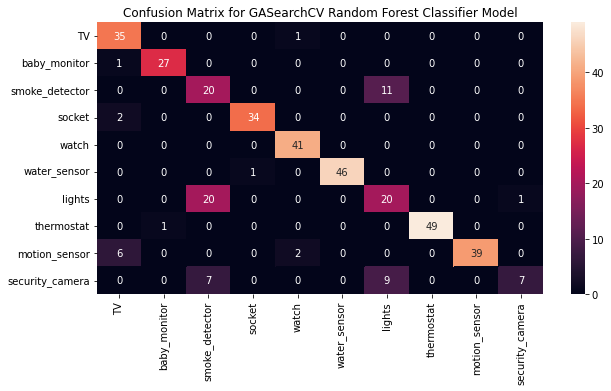

In [ ]:
plt.figure(figsize= (10,5))
hm_ga_rf_model = sns.heatmap(cm_ga_rf_model, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_ga_rf_model = hm_ga_rf_model.set_title("Confusion Matrix for GASearchCV Random Forest Classifier Model")

### Principal Component Analysis for Feature Extraction and Dimensionality Reduction


We will do feature extraction using Principal Component Analysis and select small set of transformed features that explain the variance well rather than taking all the features including ones that doesn't contribute much in the learning process. 

This helps in dimensionality reduction and helps in bringing the data set from a large feature space to smaller feature space.


![PCA](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png)


[Image Reference : https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png]

In [ ]:
# PCA on data
from sklearn.decomposition import PCA

In [ ]:
# We have tried to use top 50 features that explain the variance in the data well
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
# Let's take a look at the cummulative explained variance by the 50 features selected through PCA.
variance_explained = sorted(pca.explained_variance_ratio_.cumsum())

In [ ]:
variance_explained

[0.17979554345997342,
 0.33495469028352,
 0.41925683054470875,
 0.4762153089342385,
 0.5307759333780705,
 0.5809257186644189,
 0.6194709985105824,
 0.6548418392046205,
 0.6850792460020559,
 0.7129162309611485,
 0.7379576983166531,
 0.761124278971427,
 0.7836153842721327,
 0.802158572459773,
 0.8181716890640927,
 0.8320588987555153,
 0.8453233176108308,
 0.8567512553167824,
 0.8678089448434738,
 0.8776928656374904,
 0.8867935307702279,
 0.8953220132276416,
 0.9035846976555593,
 0.9111041054290525,
 0.9179970327345424,
 0.924204259095669,
 0.9297481357548616,
 0.9350326828203522,
 0.9395893771347167,
 0.9438155569184248,
 0.9477489898747219,
 0.951455610267926,
 0.9550979528580725,
 0.958566775959078,
 0.9615210452522813,
 0.9641719588684488,
 0.9666662985488165,
 0.9690853531816248,
 0.9712146527970615,
 0.9731653585347373,
 0.9750249640432475,
 0.976744070620301,
 0.9783559174498064,
 0.9798123431745874,
 0.9810797515043281,
 0.9823201424808283,
 0.9834492906860554,
 0.9845593188987026

We can see that the reduced set of features capture and explain about 98.65% variance in the dataset.

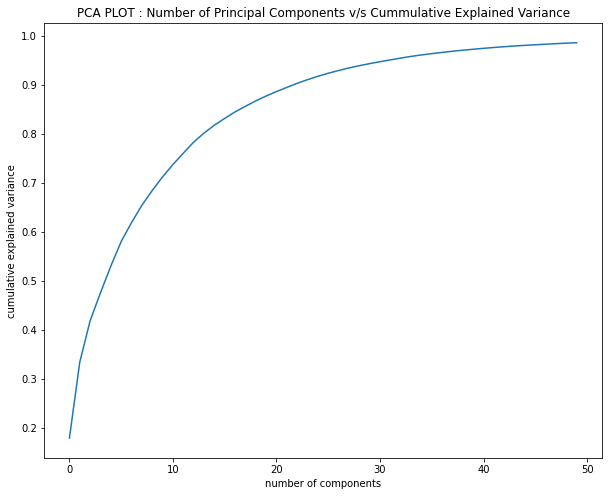

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(variance_explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('PCA PLOT : Number of Principal Components v/s Cummulative Explained Variance');

In [ ]:
X_test_pca = pca.transform(X_test)

## Random Forest Classifier on top features obtained using PCA

In [ ]:
# We initialise the model 
rs_rf_model_pca = RandomForestClassifier()
rs_rf_model_pca = RandomizedSearchCV(randomForestClassifier,param_distributions=params,cv=5,n_iter=20,n_jobs=1,verbose=0)

In [ ]:
# Training the RF model on PCA data

start_rs_rf_model_pca = time.time()
rs_rf_model_pca.fit(X_train_pca, y_train)
end_rs_rf_model_pca = time.time()

In [ ]:
total_time_rs_rf_model_pca = end_rs_rf_model_pca - start_rs_rf_model_pca
print(f'Time taken for Random Forest Classifier using Randomized Search CV model on PCA data to train is : {total_time_rs_rf_model_pca:.2f}s')

Time taken for Random Forest Classifier using Randomized Search CV model on PCA data to train is : 41.54s


In [ ]:
rs_rf_accuracy_train_pca = rs_rf_model_pca.score(X_train_pca, y_train)

In [ ]:
rs_rf_accuracy_test_pca = rs_rf_model_pca.score(X_test_pca, y_test)

In [ ]:
# Printing the train and test set accuracy for RandomizedSearchCV Random Forest Classifier (PCA) model
print(f'The train set accuracy of RandomizedSearchCV Random Forest Classifier (PCA) model is {rs_rf_accuracy_train_pca*100:.2f}%')
print(f'The test set accuracy of RandomizedSearchCV Random Forest Classifier (PCA) model is {rs_rf_accuracy_test_pca*100:.2f}%')

The train set accuracy of RandomizedSearchCV Random Forest Classifier (PCA) model is 96.32%
The test set accuracy of RandomizedSearchCV Random Forest Classifier (PCA) model is 85.26%


In [ ]:
rs_rf_model_pca.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 30}

In [ ]:
Y_pred_rs_rf_pca = rs_rf_model_pca.predict(X_test_pca)

In [ ]:
cm_rs_rf_model_pca = metrics.confusion_matrix(y_test, Y_pred_rs_rf_pca)
print(cm_rs_rf_model_pca)
cm_rs_rf_model_pca.shape

[[32  0  0  2  1  0  0  0  1  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0 12  0  0  1]
 [ 1  0  0 34  0  0  0  0  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0 17  0  0  0 17  0  0  7]
 [ 0  0  0  0  0  0  0 49  1  0]
 [ 1  0  0  1  0  0  0  0 45  0]
 [ 0  0  3  0  0  0  6  0  0 14]]


(10, 10)

In [ ]:
misclassified_rs_rf_model_pca = misclassified_total(cm_rs_rf_model_pca)
misclassified_rs_rf_model_pca

56

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred_rs_rf_pca))

                 precision    recall  f1-score   support

             TV       0.94      0.89      0.91        36
   baby_monitor       1.00      1.00      1.00        28
         lights       0.47      0.58      0.52        31
  motion_sensor       0.89      0.94      0.92        36
security_camera       0.98      1.00      0.99        41
 smoke_detector       1.00      0.98      0.99        47
         socket       0.49      0.41      0.45        41
     thermostat       1.00      0.98      0.99        50
          watch       0.94      0.96      0.95        47
   water_sensor       0.64      0.61      0.62        23

       accuracy                           0.85       380
      macro avg       0.83      0.84      0.83       380
   weighted avg       0.85      0.85      0.85       380



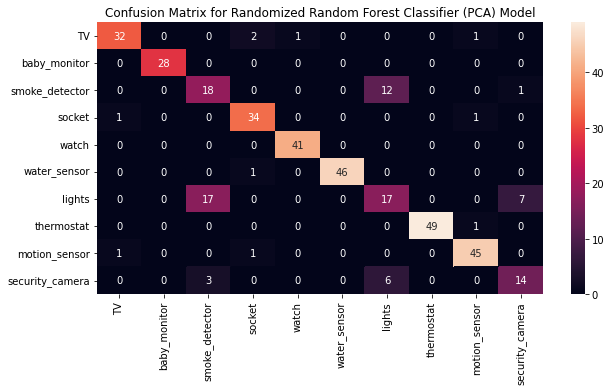

In [ ]:
plt.figure(figsize= (10,5))
hm_rs_rf_model_pca = sns.heatmap(cm_rs_rf_model_pca, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_rs_rf_model_pca = hm_rs_rf_model_pca.set_title("Confusion Matrix for Randomized Random Forest Classifier (PCA) Model")

## Genetic Algorithm for finding out best parameters on extracted features using PCA

In [ ]:
start_ga_rf_model_pca = time.time()
evolved_estimator.fit(X_train_pca,y_train)
end_ga_rf_model_pca = time.time()

total_time_ga_rf_model_pca = -(start_ga_rf_model_pca - end_ga_rf_model_pca)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.769481	0.044199   	0.833556   	0.6954     
1  	19    	0.814079	0.0193844  	0.833556   	0.776317   
2  	17    	0.824079	0.00587451 	0.8342     	0.815132   
3  	17    	0.829012	0.00475209 	0.8342     	0.817118   
4  	18    	0.83138 	0.0021616  	0.8342     	0.828939   
5  	18    	0.833288	0.00452674 	0.840128   	0.825674   
6  	18    	0.836968	0.0033009  	0.840128   	0.83222    
7  	17    	0.835986	0.00418015 	0.840793   	0.828951   
8  	20    	0.836183	0.00489024 	0.840797   	0.824986   
9  	19    	0.839872	0.00212531 	0.840797   	0.833559   
10 	18    	0.839677	0.00238855 	0.840797   	0.832912   


In [ ]:
print(f'Time taken by the GASearch Random Forest Classifier (PCA) to find the best set of Hyperparameters is : {total_time_ga_rf_model_pca:.2f}s')

Time taken by the GASearch Random Forest Classifier (PCA) to find the best set of Hyperparameters is : 513.71s


In [ ]:
Y_pred_ga_rf_model_test_pca = evolved_estimator.predict(X_test_pca)

In [ ]:
accuracy_ga_rf_model_test_pca = accuracy_score(y_test, Y_pred_ga_rf_model_test_pca)

In [ ]:
Y_pred_ga_rf_model_train_pca = evolved_estimator.predict(X_train_pca)

In [ ]:
accuracy_ga_rf_model_train_pca = accuracy_score(y_train, Y_pred_ga_rf_model_train_pca)

In [ ]:
print(f'The train set accuracy of the Random Forest Classifier (PCA) using GASearch CV is : {accuracy_ga_rf_model_train_pca*100:.2f}%')
print(f'The test set accuracy of the Random Forest Classifier (PCA) using GASearch CV is : {accuracy_ga_rf_model_test_pca*100:.2f}%')

The train set accuracy of the Random Forest Classifier (PCA) using GASearch CV is : 88.68%
The test set accuracy of the Random Forest Classifier (PCA) using GASearch CV is : 83.95%


In [ ]:
cm_ga_rf_model_pca = metrics.confusion_matrix(y_test, Y_pred_ga_rf_model_test_pca)
print(cm_ga_rf_model_pca)
# cm_ga_rf_model_pca.shape

[[33  0  0  1  1  0  0  0  1  0]
 [ 0 26  0  0  2  0  0  0  0  0]
 [ 0  0 18  0  0  0 13  0  0  0]
 [ 3  0  0 32  0  0  0  0  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0 17  0  0  0 19  0  0  5]
 [ 0  0  0  0  0  0  0 49  1  0]
 [ 3  0  0  1  0  0  0  0 43  0]
 [ 0  0  3  0  0  0  8  0  0 12]]


In [ ]:
misclassified_ga_rf_model_pca = misclassified_total(cm_ga_rf_model_pca)
misclassified_ga_rf_model_pca

61

In [ ]:
print(classification_report(y_test, Y_pred_ga_rf_model_test_pca))

                 precision    recall  f1-score   support

             TV       0.85      0.92      0.88        36
   baby_monitor       1.00      0.93      0.96        28
         lights       0.47      0.58      0.52        31
  motion_sensor       0.91      0.89      0.90        36
security_camera       0.93      1.00      0.96        41
 smoke_detector       1.00      0.98      0.99        47
         socket       0.47      0.46      0.47        41
     thermostat       1.00      0.98      0.99        50
          watch       0.93      0.91      0.92        47
   water_sensor       0.71      0.52      0.60        23

       accuracy                           0.84       380
      macro avg       0.83      0.82      0.82       380
   weighted avg       0.84      0.84      0.84       380



Heatmap of GASearchCV on PCA data that shows how many examples from the test set were correctly classified and how many were incorrectly classified.

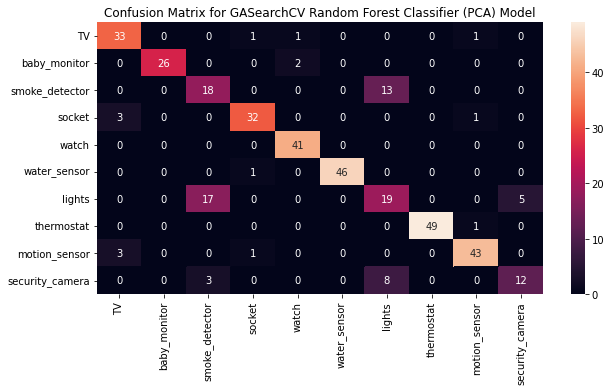

In [ ]:
plt.figure(figsize= (10,5))
hm_ga_rf_model_pca = sns.heatmap(cm_ga_rf_model_pca, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_ga_rf_model_pca = hm_ga_rf_model_pca.set_title("Confusion Matrix for GASearchCV Random Forest Classifier (PCA) Model")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Model 2 : Logistic Regression

Logistic regression is a classification algorithm, used for prediction of an occurence of a particular event based on the probability. 

A logistic curve with logit function is used on which the data is fitted and model is trained. 

The model learns to predict a categorical output based on the features which may be discrete or continuous or a combination of both. 

The algorithm works by taking the linear combination of input
values with weights or coefficients in order to make a
prediction of an output value.

- ln(y) = b0 + b1 ∗ X



where X = Input Variable, y = Output target, b0 = Bias, b1 =
Weight.

The right side calculation is linear whereas the left side
ratio is known as log-odds ratio of the default class ie.
ratio of probability of the event over the probability of
not of the event.


The below figure shows the logistic regression curve that seperates different classes/categories.



![logistic_regression.png](https://miro.medium.com/max/1838/1*RqXFpiNGwdiKBWyLJc_E7g.png)



[Image Reference : https://miro.medium.com/max/1838/1*RqXFpiNGwdiKBWyLJc_E7g.png]




In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty='l1', tol=0.001, solver ='saga')

In [ ]:
start_lr_model = time.time()
lr_model = lr_model.fit(X_train, y_train) 
end_lr_model = time.time()

total_time_lr_model = end_lr_model - start_lr_model

In [ ]:
print(f'Time taken by the Logistic Regressor to learn the classification of the IOT devices is : {total_time_lr_model:.2f}s')

Time taken by the Logistic Regressor to learn the classification of the IOT devices is : 3.68s


In [ ]:
accuracy_lr_model_train = lr_model.score(X_train, y_train)

In [ ]:
accuracy_lr_model_test = lr_model.score(X_test, y_test)

In [ ]:
Y_pred_lr_model = lr_model.predict(X_test)

In [ ]:
print(f'The train set accuracy of the Logistic Regressor is : {accuracy_lr_model_train*100:.2f}%')
print(f'The test set accuracy of the Logistic Regressor is : {accuracy_lr_model_test*100:.2f}%')

The train set accuracy of the Logistic Regressor is : 80.72%
The test set accuracy of the Logistic Regressor is : 79.47%


In [ ]:
cm_lr_model = metrics.confusion_matrix(y_test, Y_pred_lr_model)
print(cm_lr_model)

[[27  0  0  1  1  0  0  5  2  0]
 [ 0 24  0  0  4  0  0  0  0  0]
 [ 0  0 29  0  0  0  2  0  0  0]
 [ 3  0  0 32  0  1  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0 29  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 49  1  0]
 [ 9  0  0  0  1  0  0  0 37  0]
 [ 0  0 13  0  0  0  5  0  0  5]]


In [ ]:
misclassified_lr_model = misclassified_total(cm_lr_model)
misclassified_lr_model

78

In [ ]:
print(classification_report(y_test, Y_pred_lr_model))

                 precision    recall  f1-score   support

             TV       0.69      0.75      0.72        36
   baby_monitor       1.00      0.86      0.92        28
         lights       0.41      0.94      0.57        31
  motion_sensor       0.94      0.89      0.91        36
security_camera       0.87      1.00      0.93        41
 smoke_detector       0.98      0.98      0.98        47
         socket       0.63      0.29      0.40        41
     thermostat       0.91      0.98      0.94        50
          watch       0.93      0.79      0.85        47
   water_sensor       1.00      0.22      0.36        23

       accuracy                           0.79       380
      macro avg       0.84      0.77      0.76       380
   weighted avg       0.84      0.79      0.78       380



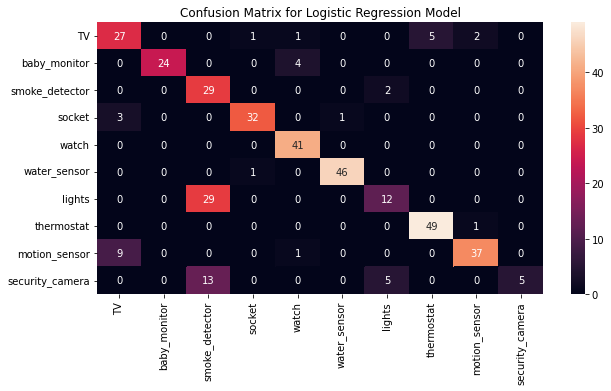

In [ ]:
plt.figure(figsize= (10,5))
hm_lr_model = sns.heatmap(cm_lr_model, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_lr_model = hm_lr_model.set_title("Confusion Matrix for Logistic Regression Model")

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid_lr = {
              'penalty':['l2','l1'],
              'solver':[ 'newton-cg','lbfgs', 'liblinear'],
              'tol' : [0.01,0.005]
            }

In [ ]:
gs_lr_model = LogisticRegression()
gs_lr_model = GridSearchCV(gs_lr_model,param_grid=params_grid_lr,cv=5,n_jobs=1,verbose=0)

In [ ]:
start_gs_lr_model = time.time()
gs_lr_model.fit(X_train,y_train)
end_gs_lr_model = time.time()

total_time_gs_lr_model = end_gs_lr_model - start_gs_lr_model 

In [ ]:
print(f'Time taken by the Grid Search CV to find best hyperparameter settings on Logistic Regression Classifier is : {total_time_gs_lr_model:.2f}s')

Time taken by the Grid Search CV to find best hyperparameter settings on Logistic Regression Classifier is : 40.62s


In [ ]:
accuracy_gs_lr_model_train = gs_lr_model.score(X_train, y_train)

accuracy_gs_lr_model_test = gs_lr_model.score(X_test, y_test)

In [ ]:
Y_pred_gs_lr_model = gs_lr_model.predict(X_test)

In [ ]:
print(f'The train set accuracy of the Grid Search CV Logistic Regressor is : {accuracy_gs_lr_model_train*100:.2f}%')
print(f'The test set accuracy of the Grid Search CV Logistic Regressor is : {accuracy_gs_lr_model_test*100:.2f}%')

The train set accuracy of the Grid Search CV Logistic Regressor is : 87.70%
The test set accuracy of the Grid Search CV Logistic Regressor is : 85.00%


In [ ]:
gs_lr_model.best_params_

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.01}

In [ ]:
cm_gs_lr_model = metrics.confusion_matrix(y_test, Y_pred_gs_lr_model)
print(cm_gs_lr_model)

[[34  0  0  0  1  0  0  1  0  0]
 [ 0 27  0  0  1  0  0  0  0  0]
 [ 0  0 25  0  0  0  6  0  0  0]
 [ 1  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0 25  0  0  0 15  0  0  1]
 [ 0  0  0  0  0  0  0 49  1  0]
 [ 3  0  0  0  1  0  0  0 43  0]
 [ 0  0  9  0  0  0  6  0  0  8]]


In [ ]:
misclassified_gs_lr_model = misclassified_total(cm_gs_lr_model)
misclassified_gs_lr_model

57

In [ ]:
print(classification_report(y_test, Y_pred_gs_lr_model))

                 precision    recall  f1-score   support

             TV       0.89      0.94      0.92        36
   baby_monitor       1.00      0.96      0.98        28
         lights       0.42      0.81      0.56        31
  motion_sensor       0.97      0.97      0.97        36
security_camera       0.93      1.00      0.96        41
 smoke_detector       1.00      0.98      0.99        47
         socket       0.56      0.37      0.44        41
     thermostat       0.98      0.98      0.98        50
          watch       0.98      0.91      0.95        47
   water_sensor       0.89      0.35      0.50        23

       accuracy                           0.85       380
      macro avg       0.86      0.83      0.82       380
   weighted avg       0.87      0.85      0.85       380



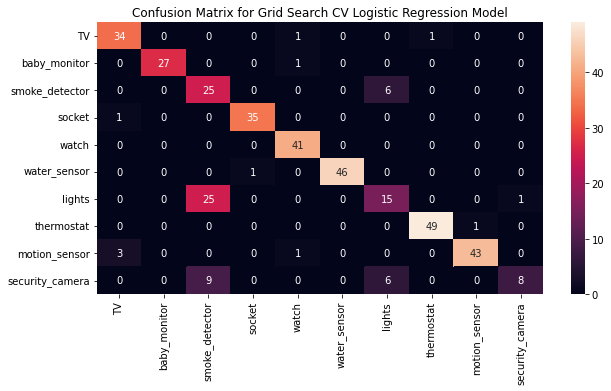

In [ ]:
plt.figure(figsize= (10,5))
hm_gs_lr_model = sns.heatmap(cm_gs_lr_model, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_gs_lr_model = hm_gs_lr_model.set_title("Confusion Matrix for Grid Search CV Logistic Regression Model")

## Model 3 : Decision Tree Classifier

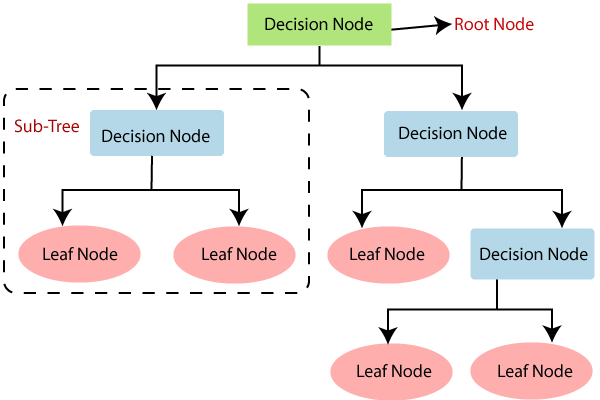

A comprehensible classification approach that may be accurate in a variety of application situations, including energy-based applications, is offered by decision tree classifiers.

By constructing
a decision tree, the decision tree classifier develops the
classification model.

A test on an attribute is specified by each node in the tree,
and each branch descending from that node represents
one of the possible values for that property. 

Each leaf is a representation of the class labels connected to the instance. 

According to the results of the tests along the path, instances in the training set are categorised by
moving them from the tree’s root to a leaf.Beginning with
the root node, each node divides the instance space into
two or more sub-spaces in accordance with an attribute
test condition. The next step is to construct a new node
by going down the tree branch that corresponds to the
attribute’s value. 

Following that, the same procedure is
performed for the subtree rooted at the new node, and
so on, until all records in the training set have been
assigned a classification. 

By selecting an attribute test
condition at each stage that optimally separates the data,
the decision tree construction process typically operates
top-down. 

To decide how to partition the records most
effectively, a variety of metrics might be employed. There
is a lot of exploitation of the Gini index impurity-based
criterion for building the tree. 

It calculates the probability that a randomly selected instance from the set would be erroneously identified if it were randomly assigned a label based on how those labels are distributed in the subset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
params_grid_dt = {
              'criterion':['gini','entropy'],
              'max_leaf_nodes': [2,5,10,20,50,100],
              'min_samples_split':[0.1,2],
              'min_samples_leaf': [2,3,4],
              'max_depth': [2,3,5,10,20,30],
            }

In [ ]:
dt_model = DecisionTreeClassifier()
gs_dt_model = GridSearchCV(dt_model,param_grid=params_grid_dt,cv=5,n_jobs=1,verbose=0)

In [ ]:
start_gs_dt_model = time.time()
gs_dt_model.fit(X_train,y_train)
end_gs_dt_model = time.time()

total_time_gs_dt_model = end_gs_dt_model - start_gs_dt_model

In [ ]:
print(f'Time taken by the Grid Search CV to find best hyperparameter settings on Decision Tree Classifier is : {total_time_gs_dt_model:.2f}s')

Time taken by the Grid Search CV to find best hyperparameter settings on Decision Tree Classifier is : 157.41s


In [ ]:
accuracy_gs_dt_model_train = gs_dt_model.score(X_train, y_train)

accuracy_gs_dt_model_test = gs_dt_model.score(X_test, y_test)

In [ ]:
Y_pred_gs_dt_model = gs_dt_model.predict(X_test)

In [ ]:
print(f'The train set accuracy of the Grid Search CV Decision Tree Classifier is : {accuracy_gs_dt_model_train*100:.2f}%')
print(f'The test set accuracy of the Grid Search CV Decision Tree Classifier is : {accuracy_gs_dt_model_test*100:.2f}%')

The train set accuracy of the Grid Search CV Decision Tree Classifier is : 95.07%
The test set accuracy of the Grid Search CV Decision Tree Classifier is : 82.63%


In [ ]:
gs_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
cm_gs_dt_model = metrics.confusion_matrix(y_test, Y_pred_gs_dt_model)
print(cm_gs_dt_model)

[[33  0  0  1  1  0  0  1  0  0]
 [ 1 26  0  1  0  0  0  0  0  0]
 [ 0  0 20  0  0  0 10  0  0  1]
 [ 3  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0 19  0  0  0 17  0  0  5]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 7  2  0  1  0  0  0  2 35  0]
 [ 0  0  5  1  0  0  5  0  0 12]]


In [ ]:
misclassified_gs_dt_model = misclassified_total(cm_gs_dt_model)
misclassified_gs_dt_model

66

In [ ]:
print(classification_report(y_test, Y_pred_gs_dt_model))

                 precision    recall  f1-score   support

             TV       0.75      0.92      0.83        36
   baby_monitor       0.93      0.93      0.93        28
         lights       0.45      0.65      0.53        31
  motion_sensor       0.89      0.92      0.90        36
security_camera       0.98      1.00      0.99        41
 smoke_detector       1.00      1.00      1.00        47
         socket       0.53      0.41      0.47        41
     thermostat       0.94      1.00      0.97        50
          watch       1.00      0.74      0.85        47
   water_sensor       0.67      0.52      0.59        23

       accuracy                           0.83       380
      macro avg       0.81      0.81      0.81       380
   weighted avg       0.84      0.83      0.83       380



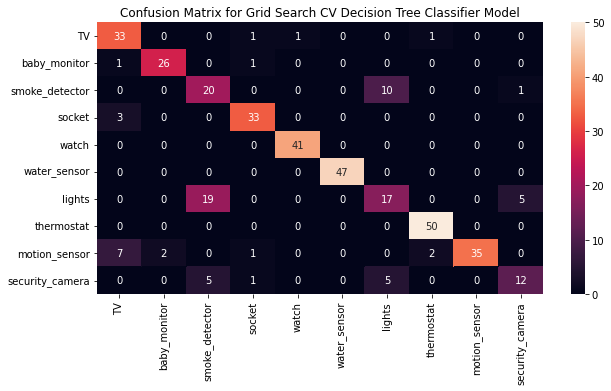

In [ ]:
plt.figure(figsize= (10,5))
hm_gs_dt_model = sns.heatmap(cm_gs_dt_model, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_gs_dt_model = hm_gs_dt_model.set_title("Confusion Matrix for Grid Search CV Decision Tree Classifier Model")

## Model 4 : XGBClassifier


XGBoost is a distributed gradient boosting library that has been developed to be very effective, adaptable, and portable. 

It uses the Gradient Boosting
framework to construct machine learning algorithms.
Many data science issues are quickly and accurately
solved using a parallel tree boosting method offered by
XGBoost. 


The same code operates on the most popular
distributed environments (Hadoop, SGE, and MPI) and
can tackle issues involving a much larger number of
samples.


Below is a representation of how the XGBoost classification algorithm works in general.


[Image Reference : https://miro.medium.com/max/1750/1*etquzYCBh3v58rcsXjDsyw.png]

![XGBoost Classifier](https://miro.medium.com/max/1750/1*etquzYCBh3v58rcsXjDsyw.png)


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
start_xgb_model = time.time()
xgb_model.fit(X_train_pca, y_train)
end_xgb_model = time.time()

total_time_xgb_model = end_xgb_model - start_xgb_model

In [ ]:
print(f'Time taken by the XGBoost Classifier to learn the classification of the IOT devices is : {total_time_xgb_model:.2f}s')

Time taken by the XGBoost Classifier to learn the classification of the IOT devices is : 5.34s


In [ ]:
accuracy_xgb_model_train = xgb_model.score(X_train_pca, y_train)

accuracy_xgb_model_test = xgb_model.score(X_test_pca, y_test)

In [ ]:
Y_pred_xgb_model = xgb_model.predict(X_test_pca)

In [ ]:
print(f'The train set accuracy of the XGBoost Classifier is : {accuracy_xgb_model_train*100:.2f}%')
print(f'The test set accuracy of the XGBoost Classifier is : {accuracy_xgb_model_test*100:.2f}%')

The train set accuracy of the XGBoost Classifier is : 96.38%
The test set accuracy of the XGBoost Classifier is : 84.21%


In [ ]:
cm_xgb_model = metrics.confusion_matrix(y_test, Y_pred_xgb_model)
print(cm_xgb_model)

[[34  0  0  0  0  0  0  1  1  0]
 [ 1 27  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0 11  0  0  1]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  0]
 [ 0  0 20  0  0  0 16  0  0  5]
 [ 0  0  0  0  0  0  0 48  2  0]
 [ 3  1  0  0  0  0  0  0 43  0]
 [ 0  0  3  0  0  0 10  0  0 10]]


In [ ]:
misclassified_xgb_model = misclassified_total(cm_xgb_model)
misclassified_xgb_model

60

In [ ]:
print(classification_report(y_test, Y_pred_xgb_model))

                 precision    recall  f1-score   support

             TV       0.89      0.94      0.92        36
   baby_monitor       0.96      0.96      0.96        28
         lights       0.45      0.61      0.52        31
  motion_sensor       0.97      1.00      0.99        36
security_camera       1.00      1.00      1.00        41
 smoke_detector       1.00      0.98      0.99        47
         socket       0.43      0.39      0.41        41
     thermostat       0.98      0.96      0.97        50
          watch       0.93      0.91      0.92        47
   water_sensor       0.62      0.43      0.51        23

       accuracy                           0.84       380
      macro avg       0.83      0.82      0.82       380
   weighted avg       0.85      0.84      0.84       380



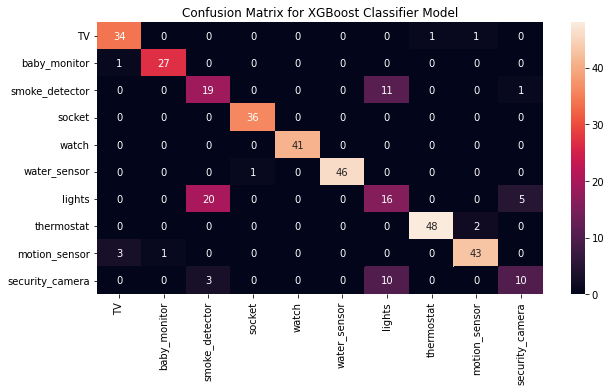

In [ ]:
plt.figure(figsize= (10,5))
hm_xgb_model = sns.heatmap(cm_xgb_model, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
hm_xgb_model = hm_xgb_model.set_title("Confusion Matrix for XGBoost Classifier Model")